# Domácí úkol č.11 
Povinná část:

Stáhni si soubor platy_2021_02.csv s informacemi o platech v softwarové firmě (stejný soubor, jako v předchozím úkolu).

Načti si tato data do tabulky a vytvoř histogram. Nastav vhodně hranice skupin histogramu (parametr bins), aby byl graf přehledný a snadno interpretovatelný.

In [32]:
import pandas

načtení dat do tabulky

In [33]:
platy_2021_02 = pandas.read_csv('platy_2021_02.txt')
platy_2021_02.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cislo_zamestnance  43 non-null     int64  
 1   plat               43 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 816.0 bytes


In [34]:
platy_2021_02.sort_values("plat").head(3)

,cislo_zamestnance,plat
27,63,31400.0
41,95,31600.0
18,38,32600.0


In [35]:
platy_2021_02.sort_values("plat").tail(3)

,cislo_zamestnance,plat
34,80,57700.0
23,49,58400.0
10,26,59600.0


Histogram

zadávala jsem různe "velikosti"bins nicméně pro určitý přehled jaká je četnost výskytu určité výše platu - či rozpětí záleží pro jaké účely tu četnost zkoumám...takže jsem zvolila bins=35 kde je i vidět že v určitém rozpětí není žádný výskyt platu. Otázkou je zda četnost v absolutním vyjádření je vypovídající nad četností vyjádřenou %.

<AxesSubplot: ylabel='Frequency'>

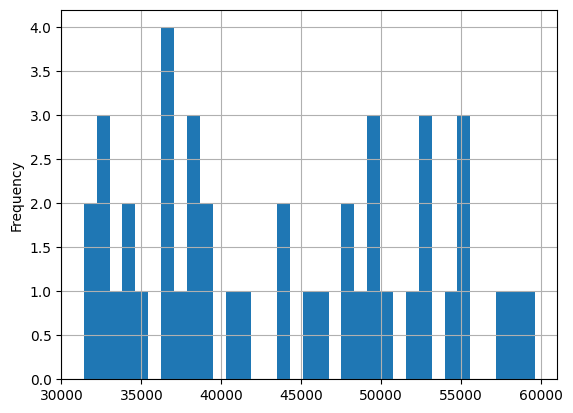

In [36]:
platy_2021_02['plat'].plot(kind="hist", bins=35, grid=True)

další rozlišení v parametru bins je zajímavé jak se zbrazení četnosti mění ve vzájeném porovnávání

<AxesSubplot: ylabel='Frequency'>

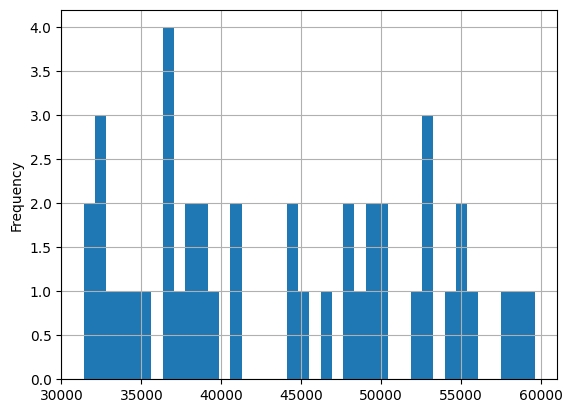

In [37]:
platy_2021_02["plat"].plot(kind="hist", bins=40, grid=True)

<AxesSubplot: ylabel='Frequency'>

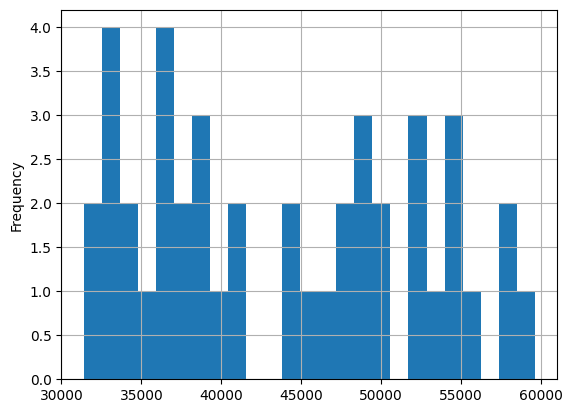

In [38]:
platy_2021_02["plat"].plot(kind="hist", bins=25, grid=True)

<AxesSubplot: ylabel='Frequency'>

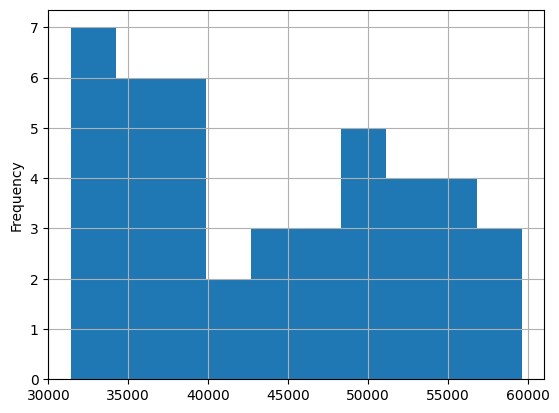

In [40]:
platy_2021_02["plat"].plot(kind="hist", bins=10, grid=True)

<AxesSubplot: ylabel='Frequency'>

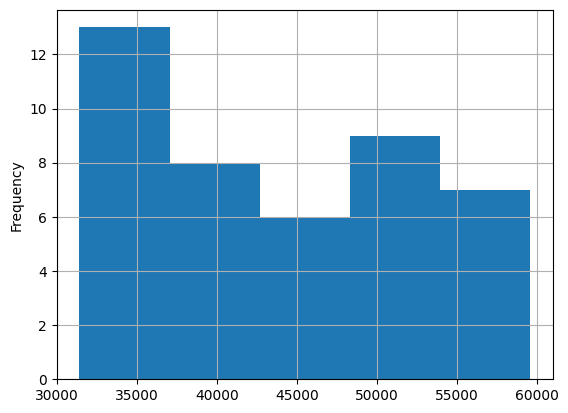

In [39]:
platy_2021_02["plat"].plot(kind="hist", bins=5, grid=True)

# Domácí úkol č.11 
Bonus: Varianta 2, kde nactu mesta do tri separatnich tabulek

Vrať se k práci se souborem temperature.csv, který obsahuje informace o průměrné teplotě v různých městech v listopadu 2017.

Vytvoř tabulku, která bude obsahovat údaje o teplotě za města Helsinki, Miami Beach a Tokyo.
Vytvoř krabicový graf a porovnej rozsah teplot v těchto městech.

načtení dat temperature.csv

In [41]:
mereni_teplot = pandas.read_csv('temperature.txt')
mereni_teplot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          8790 non-null   object 
 1   Country         8790 non-null   object 
 2   City            8790 non-null   object 
 3   Day             8790 non-null   int64  
 4   AvgTemperature  8790 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 343.5+ KB


Vytvoření tabulky, kde jsou pouze města Helsinki, Miami Beach a Tokyo. Nejprve si vytvořím samostatne tabulky pro jednotlivá města a pak je spojím pomocí metody concat do jedné.

Tabulka teplot Helsinki

In [57]:
mereni_teplot_Helsinki = mereni_teplot[(mereni_teplot["City"] == "Helsinki")].drop("Country", axis="columns").drop("Region", axis="columns").drop("City", axis="columns").rename(columns={'AvgTemperature': 'Helsinki_avgTeplota'}).set_index("Day")
mereni_teplot_Helsinki.head(6)

,Helsinki_avgTeplota
Day,
1,29.6
2,29.5
3,35.1
4,44.5
5,45.5
6,43.8


Tabulka teplot Miami Beach

In [58]:
mereni_teplot_Miami_Beach = mereni_teplot[(mereni_teplot["City"] == "Miami Beach")].drop("Country", axis="columns").drop("Region", axis="columns").drop("City", axis="columns").rename(columns={'AvgTemperature': 'Miami Beach_avgTeplota'}).set_index("Day")
mereni_teplot_Miami_Beach.head(6)

,Miami Beach_avgTeplota
Day,
1,74.6
2,76.8
3,77.4
4,77.4
5,77.2
6,78.6


Tabulka teplot Tokyo

In [59]:
mereni_teplot_Tokyo = mereni_teplot[(mereni_teplot["City"] == "Tokyo")].drop("Country", axis="columns").drop("Region", axis="columns").drop("City", axis="columns").rename(columns={'AvgTemperature': 'Tokyo_avgTeplota'}).set_index("Day")
mereni_teplot_Tokyo.head(6)

,Tokyo_avgTeplota
Day,
1,59.1
2,62.3
3,64.1
4,59.6
5,57.0
6,60.4


Spojení tří df do jedné df pomocí metody concat

In [60]:
tabulka_teplot_vyber_mest = pandas.concat([mereni_teplot_Helsinki, mereni_teplot_Miami_Beach, mereni_teplot_Tokyo], axis=1, join="outer")
tabulka_teplot_vyber_mest.head(6)
#tabulka_teplot_vyber_mest.info()

,Helsinki_avgTeplota,Miami Beach_avgTeplota,Tokyo_avgTeplota
Day,,,
1,29.6,74.6,59.1
2,29.5,76.8,62.3
3,35.1,77.4,64.1
4,44.5,77.4,59.6
5,45.5,77.2,57.0
6,43.8,78.6,60.4


Krabicový graf

<AxesSubplot: >

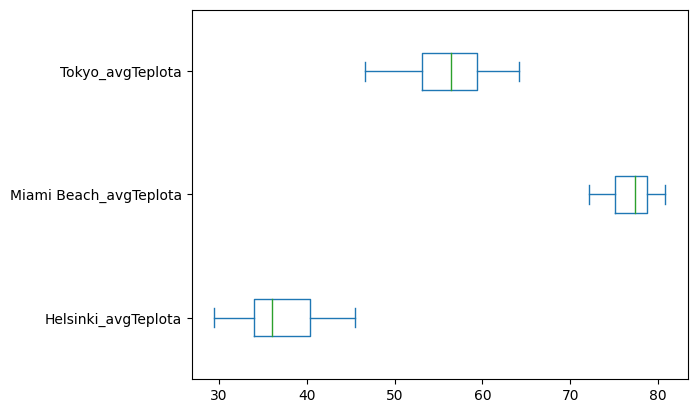

In [61]:
tabulka_teplot_vyber_mest.plot(kind="box", vert=False) # tento je z mého pohledu přehlednější

Jiné typy grafů

Histogram je také vypovídající pro porovnávání

array([<AxesSubplot: ylabel='Frequency'>,
       <AxesSubplot: ylabel='Frequency'>,
       <AxesSubplot: ylabel='Frequency'>], dtype=object)

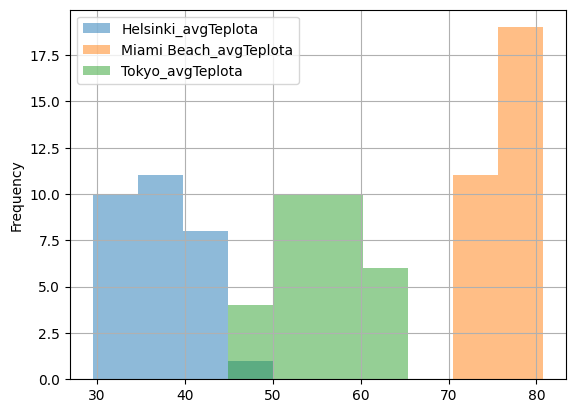

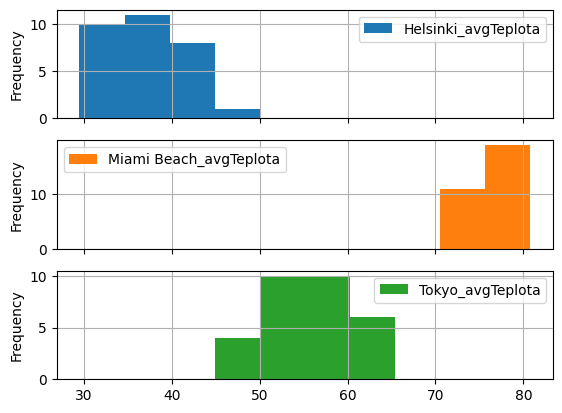

In [65]:
tabulka_teplot_vyber_mest.plot(kind="hist", grid=True, alpha=0.5)
tabulka_teplot_vyber_mest.plot(kind="hist", grid=True, subplots=True)

Sloupcový ještě také

array([<AxesSubplot: title={'center': 'Helsinki_avgTeplota'}, xlabel='Day'>,
       <AxesSubplot: title={'center': 'Miami Beach_avgTeplota'}, xlabel='Day'>,
       <AxesSubplot: title={'center': 'Tokyo_avgTeplota'}, xlabel='Day'>],
      dtype=object)

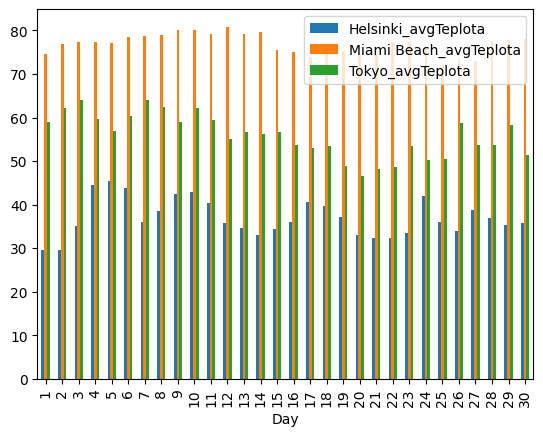

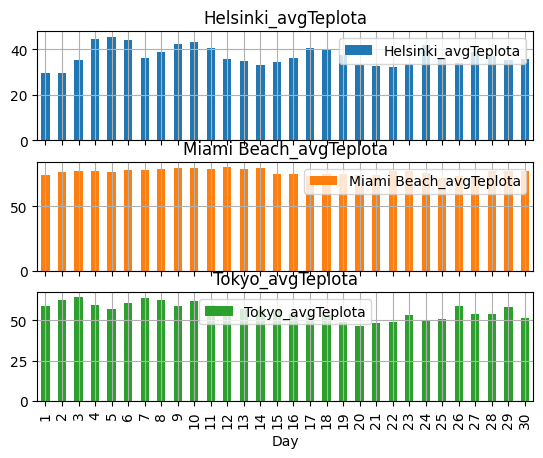

In [64]:
tabulka_teplot_vyber_mest.plot(kind="bar")
#tabulka_teplot_vyber_mest.plot(kind="bar", grid=True, subplots=True)

Ještě jsem dělala variantu merge - tzv. step by step

In [68]:
tabulka_Helsinki_MiamiBeach = mereni_teplot_Helsinki.merge(mereni_teplot_Miami_Beach, on="Day", how="outer")
tabulka_teplot_Helsinki_MiamiBeach_Tokyo = tabulka_Helsinki_MiamiBeach.merge(mereni_teplot_Tokyo, on="Day", how="outer")
#tabulka_teplot_Helsinki_MiamiBeach_Tokyo.head(6)
tabulka_teplot_Helsinki_MiamiBeach_Tokyo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Helsinki_avgTeplota     30 non-null     float64
 1   Miami Beach_avgTeplota  30 non-null     float64
 2   Tokyo_avgTeplota        30 non-null     float64
dtypes: float64(3)
memory usage: 960.0 bytes
